# Using Training and Validation Sets

In this notebook you will use training and validation sets to identify which model best fits the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import polyfit
import pathlib as pl
import os
import pandas as pd
np.random.seed(10) # set the random seed for reproducibility 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
def polynomial(x, coeffs):
    """calculates y values of polynomial at inputs x
    :param x: the input values the polynomial is to be evaluated at
    :param coeffs: the coefficients of the polynomial. The polynomial is of order len(coeffs)-1 """
    poly = np.poly1d(coeffs)
    return poly(x)

In [3]:
path_csv = pl.Path(os.getcwd()) / f'M5_data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

data = {'X':data_pd['x'].to_numpy(), 'Y':data_pd['y'].to_numpy()}

## Part 1: Model Selection

### Task 1.1: Split the data

The first thing we do is split the data into the relevant sets using the split_data function. To begin with, split the data into 40% training, 30% validation and 30% test. 

In [4]:
def split_data(data_dict, data_split):
    """divide the data into training, validate and test sets. 
    :param data_dict: a dictionary of the data with keys 'X' and 'Y'
    :param data_split: a list of the fraction of the data to be in each set of form 
    [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
    :returns training_dict, validation_dict, test_dict: dictionaries of the same form as the data_dict, 
    containing the different sets"""
    
    # The code checks that the sum of the fractions in data_split is approximately equal to 1. This is to ensure that the user hasn't made an error in specifying the split fractions.
    assert np.sum(data_split)-1 < 0.01
    
    # work out how many datapoints will be in the train and validation sets; data_split[0]=train; data_split[1]=validate
    n_train = int(len((data_dict['X']))*data_split[0])
    n_validate = int(len((data_dict['X']))*data_split[1])
    
    # generate a random permutation of indices of the data and split into training, validation and test
    perm = np.random.permutation(range(len(data_dict['X'])))
    indices_train, indices_validate, indices_test = np.split(perm, [n_train, n_train+ n_validate])
    
    # create training, validation and test dictionaries 
    training_dict = {'X': data_dict['X'][indices_train], 'Y': data_dict['Y'][indices_train]}
    validation_dict = {'X': data_dict['X'][indices_validate], 'Y': data_dict['Y'][indices_validate]}
    test_dict = {'X': data_dict['X'][indices_test], 'Y': data_dict['Y'][indices_test]}
    
    return training_dict, validation_dict, test_dict

In [5]:
# split the data into training, validation and test sets

### TO DO ###
#define the percentage for split: 40% for training, 30%  for validation and 30% for test
data_split =[0.4,0.3,0.3]

training_dict, validation_dict, test_dict = split_data(data, data_split)
#################

### Task 1.2: Fit Models

Use the numpy polyfit function to fit polynomials of orders 1 to 6 to the training set. Make a dictionary containing the coefficients of the polynomials with the order of the polynomial as the key. So the coefficients dictionary should look like { 1: array, 2:array} and so on. 

In [6]:
orders = list(range(1, 7))
coefficients = {}

#######################
#TO DO: make dictionary containing coefficients of polynomials fitted to the training data as described above. 

# Placeholder for training data
x_train = training_dict['X'] #(your x values from the training set)
y_train = training_dict['Y'] #(your y values from the training set)

for order in orders:
    coeffs = np.polyfit(x_train, y_train, order)
    coefficients[order] = coeffs

print(coefficients)

######################

{1: array([14.37688846, -3.86882537]), 2: array([-7.55140829, 10.61424628,  7.29494671]), 3: array([ 8.7770188 , -1.22760413, -5.95327463,  3.5404908 ]), 4: array([ 0.30262631,  9.08465115, -2.10093565, -6.43452654,  4.04420196]), 5: array([ -1.80022489,  -1.54498423,  15.37694466,   1.61605629,
       -11.50766964,   3.53793274]), 6: array([ 1.07221448, -0.49185441, -5.89539748, 11.60669026,  6.56350968,
       -9.32231917,  2.2379921 ])}


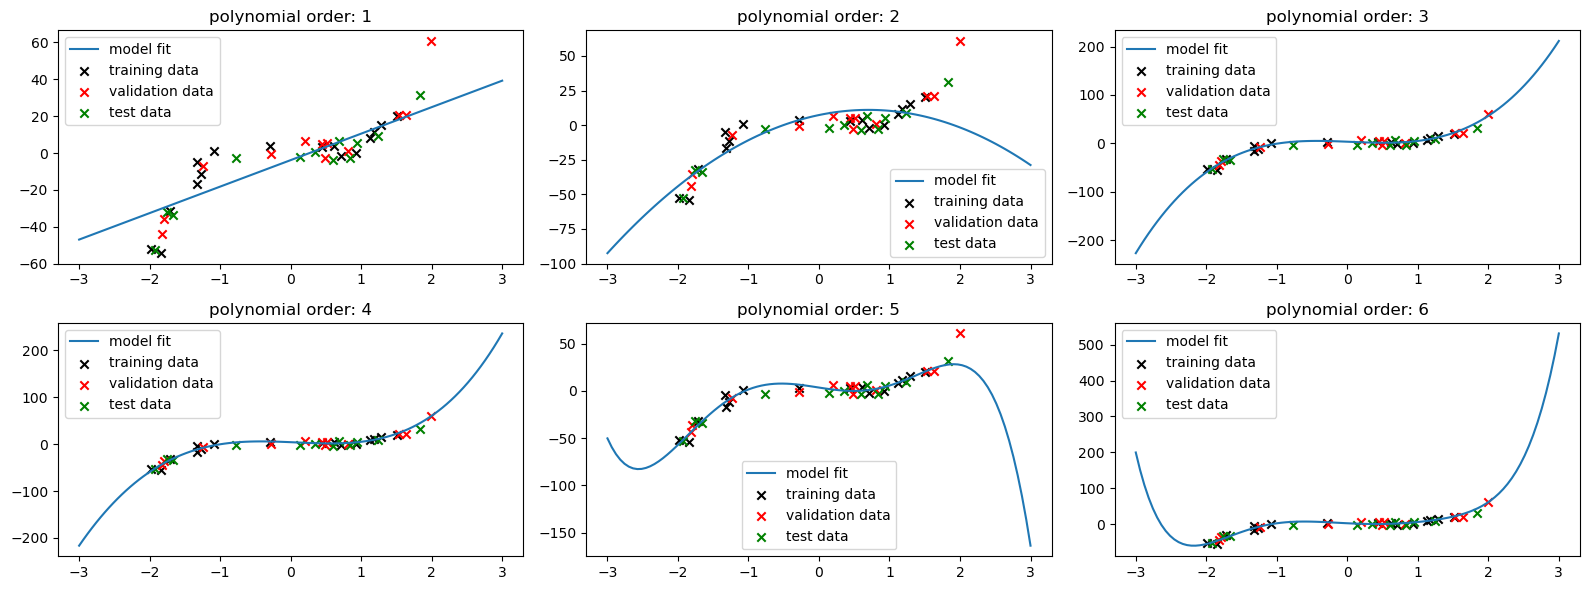

In [7]:
#### Plot each of the fitted models along with the training and validation data 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
ax = axs.flatten()

x_plot = np.linspace(-3, 3, 100)

for i, coeffs in enumerate(coefficients.values()):
    ax[i].plot(x_plot, polynomial(x_plot, coeffs), label='model fit')
    ax[i].scatter(training_dict['X'], training_dict['Y'], marker='x', color='k', label='training data')
    ax[i].scatter(validation_dict['X'], validation_dict['Y'], marker='x', color='r', label='validation data')
    ax[i].scatter(test_dict['X'], test_dict['Y'], marker='x', color='g', label='test data')
    ax[i].set_title(f'polynomial order: {list(coefficients.keys())[i]}')
    ax[i].legend()
plt.tight_layout()
plt.legend()



### Task 1.3: Calculate the RMSE for Training and Validation Sets


Calculate the root mean squared error for both the training and validation sets. Plot this on a graph, and use this to decide which model is the best fit. Fill out the first question in the corrosponding questionaire. 

In [8]:
training_RMSEs = []
validation_RMSEs = []
orders = list(range(1, 7))

#######################
### TO DO ###

# Placeholder data
# Ensure that you have these datasets available
x_validate = validation_dict['X']
y_validate = validation_dict['Y']

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

for order in orders:
    # Get coefficients for this order
    coeffs = coefficients[order]
    
    # Predict on the training and validation data
    training_predictions = np.polyval(coeffs, x_train)
    validation_predictions = np.polyval(coeffs, x_validate)
    
    # Calculate the RMSE
    training_rmse = rmse(training_predictions, y_train)
    validation_rmse = rmse(validation_predictions, y_validate)
    
    # Append to the lists
    training_RMSEs.append(training_rmse)
    validation_RMSEs.append(validation_rmse)
    
#######################

best = np.argmin(validation_RMSEs)
print('best model:', orders[best])

best model: 3


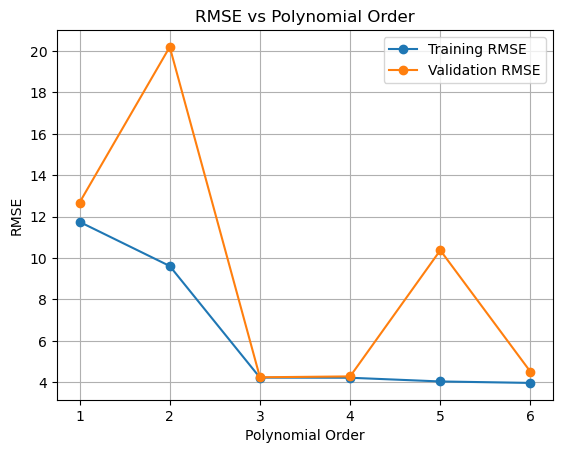

In [9]:
### TO DO ####
#Plot the training and validation RMSEs of the models
plt.plot(orders, training_RMSEs, label='Training RMSE', marker='o')
plt.plot(orders, validation_RMSEs, label='Validation RMSE', marker='o')
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Polynomial Order')
plt.grid(True)
plt.show()

## Part 2: Model Performance

### Task 2.1 Use the test set to evaluate model performance 

Calculate the RMSE of the model predictions compared to the test data 

In [10]:
### TO DO: use the test dataset to calculate the RMSE of the best model on the test data
test_RMSEs = []

x_test = test_dict['X']
y_test = test_dict['Y']

for order in orders:
    # Get coefficients for this order
    coeffs = coefficients[order]
    
    # Predict on the test data
    test_predictions = np.polyval(coeffs, x_test)
       
    # Calculate the RMSE
    test_rmse = rmse(test_predictions, y_test)
    
    # Append to the lists
    test_RMSEs.append(test_rmse)
    
best = np.argmin(test_RMSEs)
print('best test model:', orders[best])
####################


best test model: 5


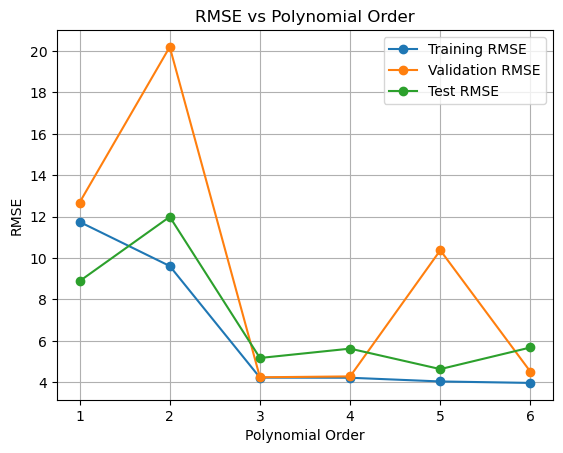

In [11]:
### TO DO ####
#Plot the training and validation RMSEs of the models
plt.plot(orders, training_RMSEs, label='Training RMSE', marker='o')
plt.plot(orders, validation_RMSEs, label='Validation RMSE', marker='o')
plt.plot(orders, test_RMSEs, label='Test RMSE', marker='o')
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Polynomial Order')
plt.grid(True)
plt.show()

In [12]:
best_rmse = validation_RMSEs[best]
print('RMSE of the best model:', best_rmse)

RMSE of the best model: 10.377325257101903
